In [344]:
import pandas as pd
import json
from easonsi import utils
from collections import defaultdict
import matplotlib.pyplot as plt

In [345]:
dpath  = 'C:/Users/liuweican/人民网比赛/raw_data/train.csv'
df = pd.read_csv(dpath,  sep='\t', encoding="utf-8")
print(df.head())

   ID                                               Text         Label
0   0   原来是这样啊，又是一个新的道理，简直让我长知识了，七星连珠是很难得的一种现象，这个解析也太到位了  label_878402
1   1   老师好厉害，咱就是说，老师，能不能，就是，研究一下能不能穿越🙏 代入感很强，我已经想穿越去...  label_878402
2   2  这个七星连珠的现象居然真的存在，我只在小说上面看过，太神奇了吧，至于其他的我也不太懂，科学现...  label_878402
3   3        应该听过张老师讲，这一个的人都会觉得特别的清晰吧，而且也明白七星连珠不会引发危害。 ​  label_878402
4   4                七星连珠这不是应该是天文知识吗，怎么物理也可以，学霸的世界我果然不懂啊  label_878402


In [346]:
def transfer_to_json(df,out_path):
    fw = open(out_path, 'w', encoding='utf-8')
    for i in range(len(df)):
        l = {}
        l["id"] = int(df.iloc[i,0])
        l["text"] = df.iloc[i,1]
        l["label"] = df.iloc[i,2].split("，")
        l = json.dumps(l, ensure_ascii=False)
        fw.write(l + '\n')
    fw.close()

In [347]:
transfer_to_json(df,"C:/Users/liuweican/人民网比赛/train.json")

In [348]:
data = utils.LoadJsonl("C:/Users/liuweican/人民网比赛/train.json")

In [349]:
print("样本条数：",len(data))

样本条数： 77314


In [350]:
categories = set()
for d in data:
    for label in d['label']:
        categories.add(label)

In [351]:
print("标签个数：",len(categories))

标签个数： 1399


In [352]:
def count(data):
    text_len_list = []
    label_count_list = []
    for d in data:
        text = d['text']
        label = d['label']
        text_len_list.append(len(text))
        label_count_list.append(len(label))
      
    return text_len_list,label_count_list
    #return sum(text_len_list)/len(text_len_list),max(text_len_list), sum(label_count_list)/len(label_count_list),max(label_count_list)

In [353]:
text_len_list,label_count_list = count(data)

文本长度信息

In [266]:
print("文本平均长度：",sum(text_len_list)/len(text_len_list))

文本平均长度： 55.01827612075433


In [267]:
print("最长文本长度：",max(text_len_list))

最长文本长度： 271


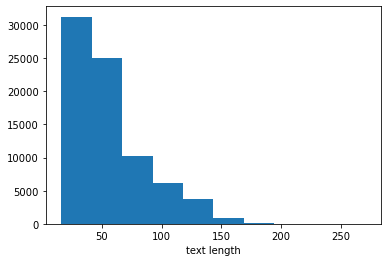

In [268]:
plt.hist(text_len_list)
plt.xlabel('text length')
plt.show()

单个样本的标签信息

In [269]:
print('平均样本标签数：',sum(label_count_list)/len(label_count_list))

平均样本标签数： 1.51751299893939


In [270]:
print('最大样本标签数：',max(label_count_list))

最大样本标签数： 8


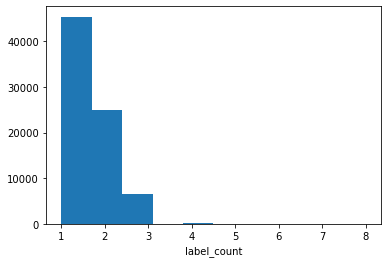

In [271]:
plt.hist(label_count_list)
plt.xlabel('label_count')
plt.show()

单个标签类别信息

In [272]:
def label_dis(data):
    res = defaultdict(int)
    for d in data:
        for label in d['label']:
            res[label] += 1
    return res

In [273]:
label_count = label_dis(data)

In [286]:
#sorted(label_count.items(), key=lambda x : x[1],reverse=True)

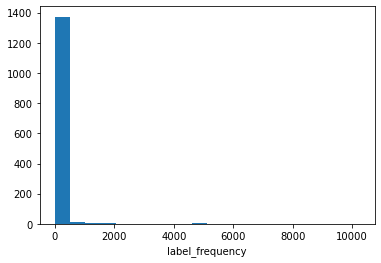

In [275]:
plt.hist(label_count.values(),bins=20)
plt.xlabel('label_frequency')
plt.show()

排除极端标签统计信息

In [333]:
#统计标签个数
def label_num(lable_count,func):
  res=0
  for l,v in label_count.items():
        if func(v):
            res+=1
  return res

In [334]:
print('出现次数为1的标签个数：',label_num(label_count,lambda x:x==1))
print('出现次数>2的标签个数：',label_num(label_count,lambda x:x>2))
print('出现次数>5的标签个数：',label_num(label_count,lambda x:x>5))
print('出现次数>10的标签个数：',label_num(label_count,lambda x:x>10))
print('出现次数>20的标签个数：',label_num(label_count,lambda x:x>20))

出现次数为1的标签个数： 6
出现次数>2的标签个数： 1389
出现次数>5的标签个数： 1347
出现次数>10的标签个数： 1075
出现次数>20的标签个数： 620


In [335]:
#去掉出现次数=1标签
label_1=[]
value_1=[]
for l,v in label_count.items():
    if v==1: 
        label_1.append(l)
        value_1.append(v)
new_label_count=dict(zip(label_1,value_1))
#label为样本个数大于1的标签列表
label_1

['label_1208167',
 'label_1467721',
 'label_1153966',
 'label_1249672',
 'label_177089',
 'label_1019030']

In [363]:
#去除极端标签，数据保存到new_train.jason
id_1=[]
for i in range(len(df)):
    for ll in df.iloc[i,2].split("，"):
        if ll in label_1:
            id_1.append(int(df.iloc[i,0]))
print(id_1)
newdf=df.drop(id_1)
newdf.to_csv("new_data.csv",index=False,encoding="utf-8")
transfer_to_json(newdf,"C:/Users/liuweican/人民网比赛/new_train.json")

[1748, 11438, 32536, 32536, 43571, 69509]


对于样本个数为10-100的标签进行观察，猜测其标签语义（观察、举例）

In [280]:
#10-100
label=[]
for l,v in label_count.items():
    if 10<=v<100: 
        label.append(l)
len(label)

989

In [281]:
#举例观察
l=label[32]
print('标签：',l)
print('对应样本个数：',label_count[l])
print('对应样本texts：')
for d in data:
    for ll in d['label']:
        if l==ll:
            print(d['text'])


标签： label_885654
对应样本个数： 27
对应样本texts：
 【上海石化火灾目前未发现对周边水体环境造成影响，已有1人死亡】 🙏🙏🙏 上海石化火灾目前未发现对周边水体环境造成影响，已有1人死亡 澎湃新闻的微博视频 ​
【上海石化火灾未发现对周边水体环境造成影响，已有1人死亡】6月18日清晨，位于上海金山的中石化上海石化乙二醇装置区域发生火灾。据新华网经初步了解，火灾已造成1人死亡。目前，未发现对周边水体环境造成影响。上海石化火灾未发现对周边水体环境造成影响，已有1人死亡 ...全文
【上海石化火灾目前未发现对周边水体环境造成影响，已有1人死亡】6月18日清晨，位于上海金山的中石化上海石化乙二醇装置区域发生火灾。据新华网经初步了解，火灾已造成1人死亡。目前，未发现对周边水体环境造成影响。 ...全文
【】据@上海石化在线 经初步核实，目前事故导致上海石化一名员工手臂轻微擦伤，一名第三方运输车辆驾驶员死亡，具体原因正在进一步调查。 ​​​​ ​
【化工企业消防安全常识】化工企业消防安全工作如何做？该注意哪些问题？戳图学习 ​ ​​​
【，目前未发现对周边水体环境造成影响】6月18日清晨，位于上海金山的中石化上海石化乙二醇装置区域发生火灾。据新华网经初步了解，火灾已造成1人死亡。目前，未发现对周边水体环境造成影响。 澎湃新闻的微博视频 ​​​
【上海石化火灾未发现对周边水体环境造成影响，已有1人死亡】6月18日清晨，位于上海金山的中石化上海石化乙二醇装置区域发生火灾。据新华网经初步了解，火灾已造成1人死亡。目前，未发现对周边水体环境造成影响。 澎湃新闻的微博视频
不幸中的万幸是：金山石化爆炸的是只是乙二醇，而不是氯气。需要了解的自救常识。   ​​​
【上海石化火灾未发现对周边水体环境造成影响，已有1人死亡】6月18日清晨，位于上海金山的中石化上海石化乙二醇装置区域发生火灾。据新华网经初步了解，火灾已造成1人死亡。目前，未发现对周边水体环境造成影响。 澎湃新闻的微博视频 ...全文
【别再疏忽大意～工厂防火安全注意啥？】消防安全，责任重于泰山！ 消防部门提醒：夏天到了，各企业要注意，厂房、仓库等防火不容忽视！ 江西消防的微博视频
【 目前正在实施保护性燃烧】6月18日，。目前，现场火势已经得到控制，正在实施保护性燃烧。经初步核实，火灾已造成一名第三方运输

将标签按频率排序，统一构建顺序并保存为文件，后续都使用同一编号

In [389]:
import ljqpy
tl = ljqpy.TokenList('tokenlist.txt',1,data,lambda x:x['label'],1)